In [42]:
import numpy as np
from scipy import io
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2

## Dataset Description

The HODA handwritten digit dataset is the first large-scale collection of Persian handwritten digits,containing 102,353 binary images. It was created during a master's project on handwritten form recognition.The data was extracted from approximately 12,000 registration forms from the 2004 national M.Sc. entrance exam and the 2003 associate degree entrance exam of Iran's University of Applied Science and Technology.

Source: 
H. Khosravi and E. Kabir, "Introducing a very large dataset of handwritten Farsi digits and a study on their varieties," Pattern Recognition Letters, vol. 28, pp. 1133-1141, 2007.


dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


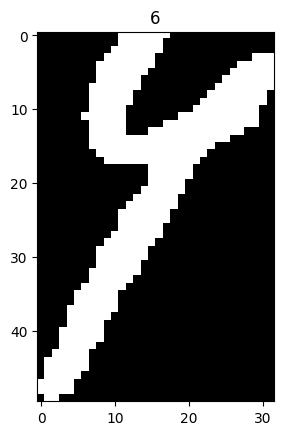

In [55]:
#loading our dataset with scipy
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

print(dataset.keys())

#Splitting Dataset to train and test sections, we may need to squeeze our data to remove unnecessary index column
X_train_original , y_train= np.squeeze(dataset['Data'][:1000]), np.squeeze(dataset['labels'][:1000])
X_test_original, y_test = np.squeeze(dataset['Data'][1000:1200]), np.squeeze(dataset['labels'][1000:1200])

#lets test the dataset and see a random number
plt.imshow(X_train_original[210], cmap='gray'); plt.title(y_train[210]);plt.show()

Text(0.5, 1.0, '6New dimension')

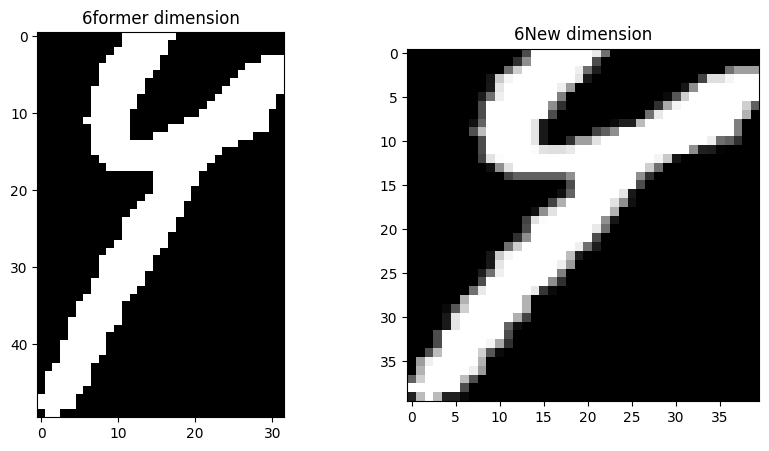

In [56]:
#lets make the data dimensions uniform and equal
#cv2.resize -> will get and img and will resize it to the new dimension
X_train_5by5 = [cv2.resize(img, dsize=(40, 40)) for img in X_train_original]
X_test_5by_5 = [cv2.resize(img, dsize=(40, 40)) for img in X_test_original]

#lets test the dataset and see a random number
plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(X_train_original[210], cmap='gray'); plt.title(str(y_train[210]) + "former dimension")
plt.subplot(122);plt.imshow(X_train_5by5[210], cmap='gray'); plt.title(str(y_train[210]) + "New dimension")

In [57]:
#lets reshape our data sets
X_train = np.reshape(X_train_5by5, [-1,1600])
X_test = np.reshape(X_test_5by_5, [-1,1600])

## K Nearest Neighbor over Hoda(persian number handwriting dataset)
Here we will use KNN algorithm aim to build a model that can predict persian numbers from pictures

In [58]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print("model's classes", model.classes_)
y_pred = model.predict(X_test)
model_reports = classification_report(y_test, y_pred)

print("\nFull Classification Report:\n", model_reports)


model's classes [0 1 2 3 4 5 6 7 8 9]

Full Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       0.93      1.00      0.97        14
           2       0.92      0.96      0.94        23
           3       0.88      0.92      0.90        24
           4       1.00      0.88      0.93        16
           5       1.00      0.85      0.92        20
           6       0.94      0.94      0.94        17
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        16
           9       0.96      0.96      0.96        25

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



## Lets Draw and Test persian numbers

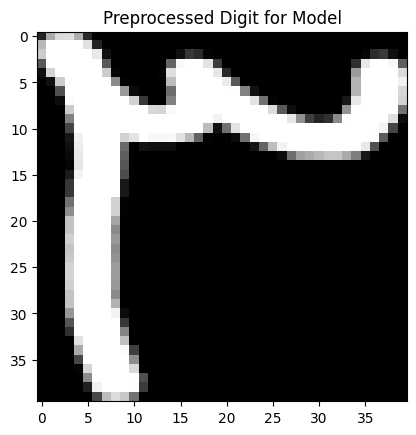

Predicted Digit: 3


In [ ]:

# Canvas board section(users can write their persian numbers over board here.)

canvas = np.ones((1000, 1000), dtype='uint8') * 255

drawing = False
def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 10, (0, 0, 0), -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

cv2.namedWindow("Draw a Digit (ESC to Predict)")
cv2.setMouseCallback("Draw a Digit (ESC to Predict)", draw)

while True:
    cv2.imshow("Draw a Digit (ESC to Predict)", canvas)
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # ESC
        break

cv2.destroyAllWindows()

# Preprocess section(color inversion and thresold and )
# Invert colors
image = 255 - canvas

# Threshold
_, image = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)

# Crop to bounding box
coords = cv2.findNonZero(image)
x, y, w, h = cv2.boundingRect(coords)
digit = image[y:y+h, x:x+w]

# Resize and center into 40x40
digit_resized = cv2.resize(digit, (40, 40), interpolation=cv2.INTER_AREA)
digit_flattened = digit_resized.flatten().astype(np.float32)

# Visual check
plt.imshow(digit_resized, cmap='gray')
plt.title("Preprocessed Digit for Model")
plt.show()

# Prediction section
digit_input = np.expand_dims(digit_flattened, axis=0)
prediction = model.predict(digit_input)
print("Predicted Digit:", prediction[0])